In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.ticker as ticker
import plotly.io as pio
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

%matplotlib inline

In [2]:
# Load Dataset

abs_path = Path.cwd()
data_address = abs_path.parent.parent / 'data/' / 'Cleaned_US.csv'
df = pd.read_csv(data_address)

In [3]:
# Give a Sample DF
sample_size = 50000
df = df.sample(n=sample_size, random_state=42)

# Static VS Dynamic

In [4]:
# Data Preprocess to create a flat dataset for static and dynamic

In [5]:
df['Weather_Condition'].value_counts().to_dict()

{'Fair': 19931,
 'Mostly Cloudy': 6500,
 'Cloudy': 6410,
 'Partly Cloudy': 4439,
 'Clear': 3165,
 'Light Rain': 2318,
 'Overcast': 1486,
 'Fog': 795,
 'Scattered Clouds': 778,
 'Light Snow': 765,
 'Haze': 672,
 'Rain': 549,
 'Fair / Windy': 269,
 'Heavy Rain': 210,
 'Light Drizzle': 150,
 'Smoke': 141,
 'T-Storm': 129,
 'Thunder in the Vicinity': 125,
 'Cloudy / Windy': 121,
 'Light Rain with Thunder': 113,
 'Mostly Cloudy / Windy': 105,
 'Thunder': 101,
 'Snow': 92,
 'Light Rain / Windy': 71,
 'Wintry Mix': 67,
 'Heavy T-Storm': 63,
 'Partly Cloudy / Windy': 63,
 'Light Snow / Windy': 47,
 'N/A Precipitation': 30,
 'Heavy Snow': 30,
 'Drizzle': 28,
 'Shallow Fog': 23,
 'Light Thunderstorms and Rain': 20,
 'Rain / Windy': 18,
 'Light Freezing Rain': 16,
 'Mist': 15,
 'Patches of Fog': 14,
 'Showers in the Vicinity': 12,
 'Heavy Rain / Windy': 12,
 'Thunderstorm': 12,
 'Light Freezing Drizzle': 10,
 'Haze / Windy': 10,
 'Heavy T-Storm / Windy': 9,
 'Light Freezing Fog': 8,
 'Heavy Thund

In [6]:
# Fair, Clear, Fair / Windy, 
# Overcast, Mostly Cloudy, Cloudy, Partly Cloudy, Scattered Clouds, 
# Light Rain, Rain, Heavy Rain
# Snow, 
# Haze, Smoke, 
# Drizzle, Thunder, Dust
# Fog


# Smoke: dud sukhtan
# Haze: ghobar

# Dust: very stong winds with solid
# Thunder: rad bargh

# Drizzle: barun ba ghatre kuchik

# Overcast: 100 percent cloud in sky

df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder and Hail / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Dust Whirlwinds / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Freezing Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Sand', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mist / Windy', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Dust Whirls', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Dust Whirls Nearby', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain Shower / Windy', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain Showers', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Blowing Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drifting Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Low Drifting Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Thunderstorms with Small Hail', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Haze', 'Haze')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Snow Nearby', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder and Hail', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow and Thunder / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Freezing Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder / Wintry Mix / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Blowing Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Ice Pellets', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Duststorm', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Funnel Cloud', 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Freezing Rain / Windy', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain Shower', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Hail', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Snow with Thunder', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Thunderstorms and Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Patches of Fog / Windy', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Volcanic Ash', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder / Wintry Mix', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow Showers', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Thunderstorms and Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain Shower / Windy', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow Grains', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Tornado', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drizzle / Windy', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow with Thunder', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Freezing Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Squalls', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Dust Whirlwinds', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow and Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Widespread Dust / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow and Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Squalls / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow Shower', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Partial Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain Showers', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Rain / Windy', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Small Hail', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Ice Pellets', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain Shower', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain Showers', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow and Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Freezing Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Smoke / Windy', 'Smoke')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Widespread Dust', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Wintry Mix / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Ice Pellets', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Drizzle / Windy', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow and Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drizzle and Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain Shower', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Dust', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Dust / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('T-Storm / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fog / Windy', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy T-Storm / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunderstorms and Rain', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Thunderstorms and Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Haze / Windy', 'Haze')
df['Weather_Condition'] = df['Weather_Condition'].replace('Showers in the Vicinity', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain / Windy', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Rain', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Shallow Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunderstorm', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mist', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Patches of Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('N/A Precipitation', 'Fair')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Thunderstorms and Rain', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain / Windy', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain / Windy', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy T-Storm', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Wintry Mix', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Partly Cloudy / Windy', 'Partly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain with Thunder', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mostly Cloudy / Windy', 'Mostly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('T-Storm', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Cloudy / Windy', 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder in the Vicinity', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Smoke', 'Smoke')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fair / Windy', 'Fair / Windy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Haze', 'Haze')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Scattered Clouds', 'Scatterred Clouds')
df['Weather_Condition'] = df['Weather_Condition'].replace('Overcast', 'Overcast')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Clear', 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].replace('Partly Cloudy', 'Partly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Cloudy', 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mostly Cloudy', 'Mostly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fair', 'Fair')


In [7]:
df['Weather_Condition'].value_counts().to_dict()

{'Fair': 19961,
 'Mostly Cloudy': 6605,
 'Cloudy': 6531,
 'Partly Cloudy': 4502,
 'Clear': 3165,
 'Light Rain': 2520,
 'Overcast': 1486,
 'Snow': 1033,
 'Fog': 848,
 'Scatterred Clouds': 778,
 'Haze': 682,
 'Rain': 610,
 'Thunder': 445,
 'Fair / Windy': 269,
 'Heavy Rain': 229,
 'Drizzle': 191,
 'Smoke': 142,
 'Dust': 3}

In [8]:
df = pd.get_dummies(df, columns=['Weather_Condition'], prefix='Weather', dtype=bool)

In [9]:
df = pd.get_dummies(df, columns=['Weekday'], prefix='Weekday', dtype=bool)

In [10]:
df['Hour'] = df['Hour'].astype('float64')
df['Month'] = df['Month'].astype('float64')

# Step 1: Convert "Hour" to 4 boolean columns
hour_labels = ['Night (0-5)', 'Morning (6-11)', 'Afternoon (12-17)', 'Evening (18-23)']
hour_bins = [0, 5, 11, 17, 23]
df['Part_of_Day'] = pd.cut(df['Hour'], bins=hour_bins, labels=hour_labels, right=False)
df = pd.get_dummies(df, columns=['Part_of_Day'], prefix='Part_of_Day', dtype=bool)

# Step 2: Convert "Month" to 12 boolean columns
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Month'].astype(int)
df = pd.get_dummies(df, columns=['Month'], prefix='Month', dtype=bool)
df.rename(columns={'Month_'+str(i): month_names[i-1] for i in range(1, 13)}, inplace=True)

# Drop the original "Hour" column as it is no longer needed
df.drop(['Hour'], axis=1, inplace=True)


In [11]:
def static_convertor(df):

    weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                             'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

    # Define the thresholds for each weather column
    thresholds = {
    'Temperature(F)': [0, 32, 70, float('inf')],
    'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
    'Humidity(%)': [0, 40, 70, 100],
    'Pressure(in)': [0, 29.5, 30, float('inf')],
    'Visibility(mi)': [0, 2, 5, float('inf')],
    'Wind_Speed(mph)': [0, 5, 10, float('inf')],
    'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
    }

    df_static_threshold = pd.DataFrame()

    # Discretize and encode weather columns using one-hot encoding
    for column in weather_float_columns:
        bins = thresholds[column]
        labels = range(len(bins) - 1)
        categories = pd.cut(df[column], bins=bins, labels=labels)
        encoded_cols = pd.get_dummies(categories, prefix=column)
        df_static_threshold = pd.concat([df_static_threshold, encoded_cols], axis=1)
        
    return df_static_threshold

In [12]:
def dynamic_convertor(df):
    # Define weather float columns
    weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                             'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

    # Create a new DataFrame for encoded columns
    df_dynamic_threshold = pd.DataFrame()

    # Discretize and encode weather columns using one-hot encoding
    for column in weather_float_columns:
        column_values = df[column]
        
        # Adjust threshold percentages if they are the same
        if len(set(column_values)) == 1:
            min_value = column_values.min()
            max_value = column_values.max()
            if min_value == max_value:
                thresholds = [0, min_value, min_value + 1, float('inf')]
            else:
                thresholds = [0, min_value, max_value, float('inf')]
        else:
            thresholds = [0, np.percentile(column_values, 15), np.percentile(column_values, 85), float('inf')]
        
        bins = np.unique(thresholds)  # Ensure unique bin edges
        labels = range(len(bins) - 1)
        categories = pd.cut(column_values, bins=bins, labels=labels)
        encoded_cols = pd.get_dummies(categories, prefix=column, dtype=bool)
        df_dynamic_threshold = pd.concat([df_dynamic_threshold, encoded_cols], axis=1)

    return df_dynamic_threshold

In [13]:
df_weather_bool_static = static_convertor(df)
df_weather_bool_dynamic = dynamic_convertor(df)

In [14]:
final_df_static = pd.concat([df, df_weather_bool_static], axis=1)
final_df_dynamic = pd.concat([df, df_weather_bool_dynamic], axis=1)

In [15]:
columns_to_drop = {'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
                   'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 
                   'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 
                   'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                    'Wind_Speed(mph)', 'Precipitation(in)'}

static_copy = final_df_static.copy()
dynamic_copy = final_df_dynamic.copy()

final_df_static.drop(columns_to_drop, axis=1, inplace=True)
final_df_dynamic.drop(columns_to_drop, axis=1, inplace=True)

In [16]:
def apply_apriori(df, min_support=0.25, min_threshold=0.5):
    # Apply Apriori algorithm
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=min_threshold)

    sorted_frequents = frequent_itemsets.sort_values('support', ascending=False)
    sorted_rules = rules.sort_values('support', ascending=False)
    print(sorted_frequents)
    print(sorted_rules)
    
    return sorted_frequents, sorted_rules

In [17]:
result_of_final_df_static = apply_apriori(final_df_static)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


    support                                           itemsets
11  0.89752                                 (Visibility(mi)_2)
5   0.75066                                  (Wind_Chill(F)_2)
25  0.69456                (Visibility(mi)_2, Wind_Chill(F)_2)
3    0.5646                                 (Temperature(F)_1)
19  0.49482               (Temperature(F)_1, Visibility(mi)_2)
7   0.44192                                    (Humidity(%)_2)
12   0.4256                                (Wind_Speed(mph)_1)
9    0.4208                                   (Pressure(in)_1)
0   0.39922                                     (Weather_Fair)
14  0.39268                   (Visibility(mi)_2, Weather_Fair)
6     0.388                                    (Humidity(%)_1)
31  0.38696              (Wind_Speed(mph)_1, Visibility(mi)_2)
17   0.3858                (Temperature(F)_1, Wind_Chill(F)_2)
27   0.3819                  (Visibility(mi)_2, Humidity(%)_1)
30  0.37842                 (Pressure(in)_1, Visibility

In [18]:
result_of_final_df_dynamic = apply_apriori(final_df_dynamic)

    support                                           itemsets
7   0.82744                                 (Visibility(mi)_1)
8   0.72292                                (Wind_Speed(mph)_0)
6   0.70378                                   (Pressure(in)_1)
3   0.70128                                 (Temperature(F)_1)
5   0.69852                                    (Humidity(%)_1)
..      ...                                                ...
67  0.26156  (Pressure(in)_1, Wind_Speed(mph)_0, Humidity(%...
37  0.25964    (Visibility(mi)_1, Weather_Fair, Humidity(%)_1)
15  0.25736     (Part_of_Day_Afternoon (12-17), Humidity(%)_1)
71  0.25644  (Pressure(in)_1, Wind_Speed(mph)_0, Wind_Chill...
36  0.25462  (Wind_Chill(F)_1, Visibility(mi)_1, Weather_Fair)

[78 rows x 2 columns]
                             antecedents  \
0                      (Wind_Chill(F)_1)   
1                     (Temperature(F)_1)   
17                       (Humidity(%)_1)   
16                    (Visibility(mi)_1)   
2

# Cluster VS NonCluster

## Static Mode

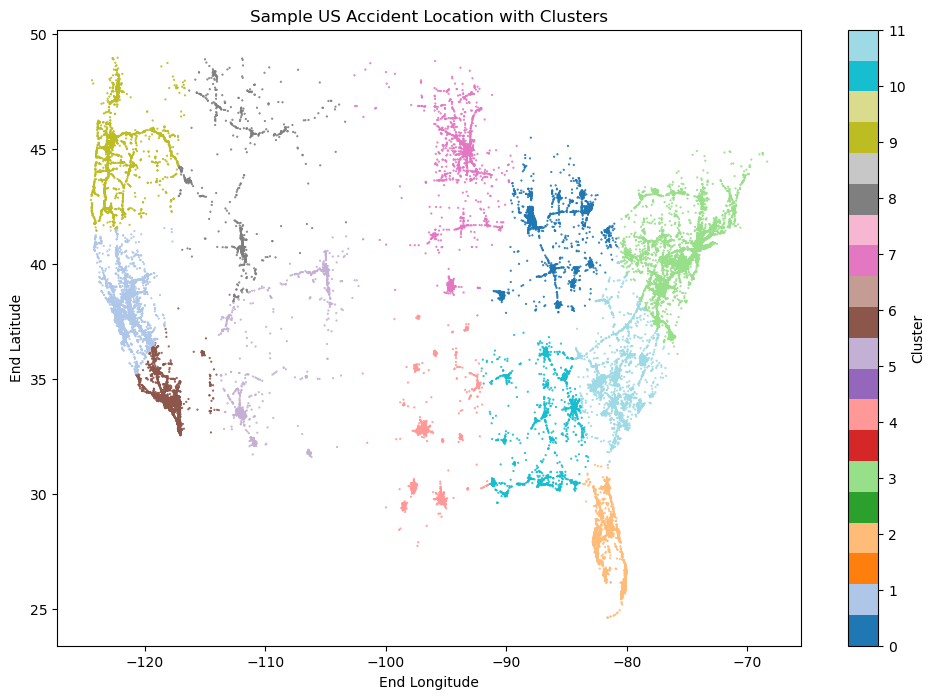

In [19]:
# Number of Clusters
n_clusters = 12

# Clustering
X = static_copy[['End_Lng', 'End_Lat']]
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
static_copy['Cluster'] = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(static_copy['End_Lng'], static_copy['End_Lat'], c=static_copy['Cluster'], cmap='tab20', s=0.3)
plt.xlabel('End Longitude')
plt.ylabel('End Latitude')
plt.title('Sample US Accident Location with Clusters')

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(12))
cbar.set_label('Cluster')

plt.show()


# Create a dict to store the dataframes for each cluster
cluster_data = {}

# Iterate over unique cluster labels
for cluster_label in static_copy['Cluster'].unique():
    # Filter the dataframe based on the cluster label
    cluster_data[cluster_label] = static_copy[static_copy['Cluster'] == cluster_label].copy()


In [20]:
results_of_static_clusters = []

for i in range(n_clusters):
    
    columns_to_drop = {'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
                   'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 
                   'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 
                   'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                    'Wind_Speed(mph)', 'Precipitation(in)', 'Cluster'}

    cluster_data[i].drop(columns_to_drop, axis=1, inplace=True)
    
    print(f"#################################### Result of Cluster {i} ####################################")
    
    results_of_static_clusters.append(apply_apriori(cluster_data[i]))

#################################### Result of Cluster 0 ####################################
     support                                           itemsets
12  0.875779                                 (Visibility(mi)_2)
6   0.588581                                  (Wind_Chill(F)_2)
26  0.542215                (Visibility(mi)_2, Wind_Chill(F)_2)
3   0.541869                                 (Temperature(F)_1)
9   0.491003                                   (Pressure(in)_0)
8   0.486505                                    (Humidity(%)_2)
20  0.465744               (Temperature(F)_1, Visibility(mi)_2)
13  0.458478                                (Wind_Speed(mph)_1)
31  0.429066                 (Pressure(in)_0, Visibility(mi)_2)
7    0.42526                                    (Humidity(%)_1)
29  0.420415                  (Visibility(mi)_2, Humidity(%)_1)
15  0.415917                              (Precipitation(in)_0)
32  0.405882              (Wind_Speed(mph)_1, Visibility(mi)_2)
34   0.373

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


     support                                           itemsets
3   0.984785                                  (Wind_Chill(F)_2)
8   0.955549                                 (Visibility(mi)_2)
29  0.940931                (Visibility(mi)_2, Wind_Chill(F)_2)
2     0.7679                                 (Temperature(F)_2)
18    0.7679                (Temperature(F)_2, Wind_Chill(F)_2)
..       ...                                                ...
68  0.259099  (Pressure(in)_2, Visibility(mi)_2, Humidity(%)_1)
61  0.258353   (Pressure(in)_2, Wind_Chill(F)_2, Humidity(%)_1)
35  0.257906                    (Humidity(%)_2, Pressure(in)_2)
79  0.257309  (Visibility(mi)_2, Pressure(in)_2, Wind_Chill(...
34   0.25179                    (Humidity(%)_2, Pressure(in)_1)

[81 rows x 2 columns]
                             antecedents  \
6                     (Visibility(mi)_2)   
7                      (Wind_Chill(F)_2)   
0                     (Temperature(F)_2)   
1                      (Wind_Chil

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


     support                                           itemsets
8   0.951754                                 (Visibility(mi)_2)
7   0.778822                                   (Pressure(in)_0)
5   0.763784                                  (Wind_Chill(F)_2)
30  0.756266                (Visibility(mi)_2, Wind_Chill(F)_2)
35  0.741855                 (Pressure(in)_0, Visibility(mi)_2)
..       ...                                                ...
39  0.256892  (Temperature(F)_2, Wind_Chill(F)_2, Weather_Fair)
40  0.256892   (Temperature(F)_2, Pressure(in)_0, Weather_Fair)
11  0.256892                   (Temperature(F)_2, Weather_Fair)
76  0.256266  (Visibility(mi)_2, Part_of_Day_Afternoon (12-1...
48  0.256266  (Part_of_Day_Afternoon (12-17), Humidity(%)_0,...

[87 rows x 2 columns]
                            antecedents                          consequents  \
4                    (Visibility(mi)_2)                    (Wind_Chill(F)_2)   
5                     (Wind_Chill(F)_2)          

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

     support                                           itemsets
12  0.865568                                 (Visibility(mi)_2)
11  0.859497                                   (Pressure(in)_0)
34  0.752819                 (Pressure(in)_0, Visibility(mi)_2)
5   0.518647                                 (Temperature(F)_1)
22  0.483088               (Temperature(F)_1, Visibility(mi)_2)
21  0.446661                 (Pressure(in)_0, Temperature(F)_1)
7   0.442324                                  (Wind_Chill(F)_2)
27  0.423244                (Visibility(mi)_2, Wind_Chill(F)_2)
40  0.415438  (Temperature(F)_1, Pressure(in)_0, Visibility(...
13  0.414571                                (Wind_Speed(mph)_1)
6   0.401561                                  (Wind_Chill(F)_1)
10  0.384215                                    (Humidity(%)_2)
36  0.366869              (Wind_Speed(mph)_1, Visibility(mi)_2)
26  0.366869                  (Pressure(in)_0, Wind_Chill(F)_2)
23  0.359931                  (Wind_Chil

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


## Dynamic Mode

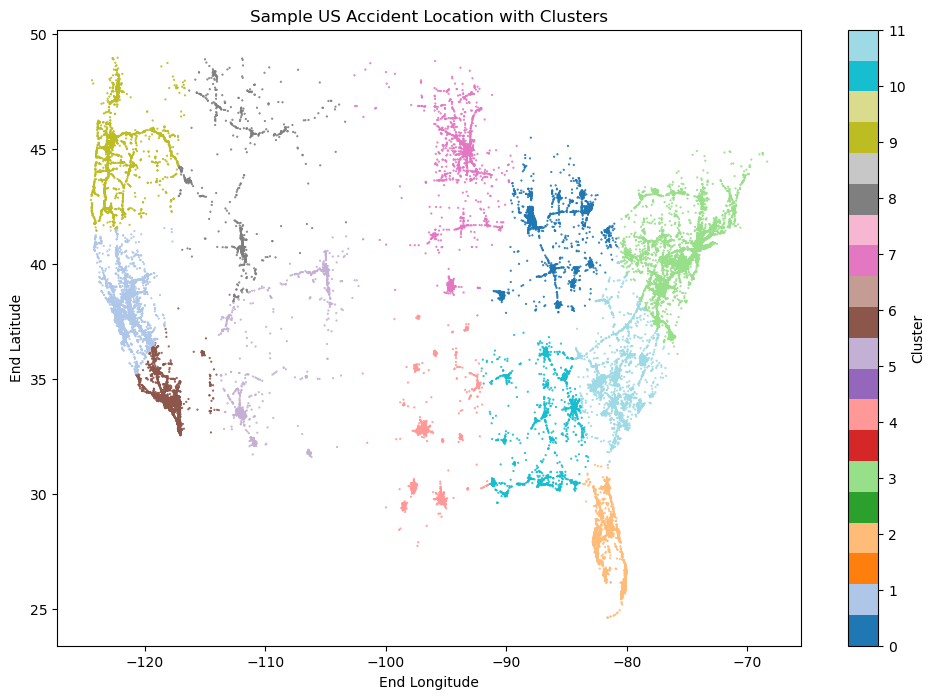

In [21]:
# Number of Clusters
n_clusters = 12

# Clustering
X = dynamic_copy[['End_Lng', 'End_Lat']]
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
dynamic_copy['Cluster'] = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(dynamic_copy['End_Lng'], dynamic_copy['End_Lat'], c=dynamic_copy['Cluster'], cmap='tab20', s=0.3)
plt.xlabel('End Longitude')
plt.ylabel('End Latitude')
plt.title('Sample US Accident Location with Clusters')

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(12))
cbar.set_label('Cluster')

plt.show()


# Create a dict to store the dataframes for each cluster
cluster_data = {}

# Iterate over unique cluster labels
for cluster_label in dynamic_copy['Cluster'].unique():
    # Filter the dataframe based on the cluster label
    cluster_data[cluster_label] = dynamic_copy[dynamic_copy['Cluster'] == cluster_label].copy()


In [22]:
results_of_dynamic_clusters = []

for i in range(n_clusters):
    
    columns_to_drop = {'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
                   'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 
                   'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 
                   'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                    'Wind_Speed(mph)', 'Precipitation(in)', 'Cluster'}

    cluster_data[i].drop(columns_to_drop, axis=1, inplace=True)
    
    print(f"#################################### Result of Cluster {i} ####################################")
    
    results_of_dynamic_clusters.append(apply_apriori(cluster_data[i]))

#################################### Result of Cluster 0 ####################################
     support                                           itemsets
9   0.806574                                 (Visibility(mi)_1)
7   0.779585                                    (Humidity(%)_1)
10  0.766782                                (Wind_Speed(mph)_0)
8   0.712111                                   (Pressure(in)_1)
30  0.679931                  (Visibility(mi)_1, Humidity(%)_1)
..       ...                                                ...
78  0.259516  (Wind_Chill(F)_1, Wind_Speed(mph)_0, Pressure(...
72  0.258824  (Pressure(in)_1, Wind_Speed(mph)_0, Wind_Chill...
59  0.258131  (Precipitation(in)_0, Wind_Speed(mph)_0, Humid...
28  0.257093             (Precipitation(in)_0, Wind_Chill(F)_1)
38  0.251211  (Part_of_Day_Afternoon (12-17), Visibility(mi)...

[79 rows x 2 columns]
                              antecedents  \
4                      (Visibility(mi)_1)   
5                        

#################################### Result of Cluster 8 ####################################
     support                                           itemsets
10  0.858630                                   (Pressure(in)_0)
11  0.815265                                 (Visibility(mi)_1)
40  0.712056                 (Pressure(in)_0, Visibility(mi)_1)
12  0.695577                                (Wind_Speed(mph)_0)
9   0.602775                                    (Humidity(%)_1)
..       ...                                                ...
17  0.256722      (Part_of_Day_Evening (18-23), Pressure(in)_0)
55  0.256722  (Pressure(in)_0, Wind_Speed(mph)_0, Temperatur...
35  0.255854                    (Pressure(in)_0, Humidity(%)_0)
31  0.250650                   (Wind_Chill(F)_1, Humidity(%)_1)
67  0.250650  (Pressure(in)_0, Wind_Chill(F)_0, Visibility(m...

[71 rows x 2 columns]
           antecedents          consequents  antecedent support  \
4     (Pressure(in)_0)   (Visibility(mi)_1)     

In [24]:
result_of_final_df_static

(    support                                           itemsets
 11  0.89752                                 (Visibility(mi)_2)
 5   0.75066                                  (Wind_Chill(F)_2)
 25  0.69456                (Visibility(mi)_2, Wind_Chill(F)_2)
 3    0.5646                                 (Temperature(F)_1)
 19  0.49482               (Temperature(F)_1, Visibility(mi)_2)
 7   0.44192                                    (Humidity(%)_2)
 12   0.4256                                (Wind_Speed(mph)_1)
 9    0.4208                                   (Pressure(in)_1)
 0   0.39922                                     (Weather_Fair)
 14  0.39268                   (Visibility(mi)_2, Weather_Fair)
 6     0.388                                    (Humidity(%)_1)
 31  0.38696              (Wind_Speed(mph)_1, Visibility(mi)_2)
 17   0.3858                (Temperature(F)_1, Wind_Chill(F)_2)
 27   0.3819                  (Visibility(mi)_2, Humidity(%)_1)
 30  0.37842                 (Pressure(i

In [25]:
result_of_final_df_dynamic

(    support                                           itemsets
 7   0.82744                                 (Visibility(mi)_1)
 8   0.72292                                (Wind_Speed(mph)_0)
 6   0.70378                                   (Pressure(in)_1)
 3   0.70128                                 (Temperature(F)_1)
 5   0.69852                                    (Humidity(%)_1)
 ..      ...                                                ...
 67  0.26156  (Pressure(in)_1, Wind_Speed(mph)_0, Humidity(%...
 37  0.25964    (Visibility(mi)_1, Weather_Fair, Humidity(%)_1)
 15  0.25736     (Part_of_Day_Afternoon (12-17), Humidity(%)_1)
 71  0.25644  (Pressure(in)_1, Wind_Speed(mph)_0, Wind_Chill...
 36  0.25462  (Wind_Chill(F)_1, Visibility(mi)_1, Weather_Fair)
 
 [78 rows x 2 columns],
                              antecedents  \
 0                      (Wind_Chill(F)_1)   
 1                     (Temperature(F)_1)   
 17                       (Humidity(%)_1)   
 16                    (Vi

In [26]:
# Lift: Lift is a measure of how much more often the antecedent and consequent of
#     a rule occur together compared to their individual occurrences. 
#     It is defined as the ratio of the observed support of both items occurring 
#     together to the expected support if they were independent. 

# A lift value 
#     greater than 1 indicates a positive correlation between the items, 
#     where values significantly higher than 1 indicate a strong association

# Note: Wind Chill and Temperature


# Leverage: Leverage measures the difference between the observed frequency of 
#     co-occurrence of the antecedent and consequent and the expected 
#     frequency if they were independent. It calculates the difference between 
#     the observed support and the expected support. A leverage value of 0 
#     indicates independence, while values greater than 0 indicate a positive 
#     association.

# Conviction: Conviction is a measure that quantifies the degree of dependency 
#     between the antecedent and consequent of a rule. It is defined as the 
#     ratio of the expected frequency of the consequent given the independence 
#     of the antecedent and consequent to the observed frequency. Conviction 
#     values greater than 1 indicate a strong association, with higher values 
#     indicating stronger dependency.

# Zhang's Metric: Zhang's metric is an evaluation measure that combines lift, 
#     leverage, and conviction to assess the strength of association rules. 
#     It provides a single score that takes into account multiple aspects of 
#     association rule quality. The formula for Zhang's metric incorporates 
#     these measures in a weighted manner to compute a combined score.


# Final Dynamic on whole dataset:

In [3]:
# Load Dataset

abs_path = Path.cwd()
data_address = abs_path.parent.parent / 'data/' / 'Cleaned_US.csv'
df = pd.read_csv(data_address)

In [4]:
# Fair, Clear, Fair / Windy, 
# Overcast, Mostly Cloudy, Cloudy, Partly Cloudy, Scattered Clouds, 
# Light Rain, Rain, Heavy Rain
# Snow, 
# Haze, Smoke, 
# Drizzle, Thunder, Dust
# Fog


# Smoke: dud sukhtan
# Haze: ghobar

# Dust: very stong winds with solid
# Thunder: rad bargh

# Drizzle: barun ba ghatre kuchik

# Overcast: 100 percent cloud in sky

df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder and Hail / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Dust Whirlwinds / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Freezing Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Sand', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mist / Windy', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Dust Whirls', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Dust Whirls Nearby', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain Shower / Windy', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain Showers', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Blowing Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drifting Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Low Drifting Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Thunderstorms with Small Hail', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Haze', 'Haze')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Snow Nearby', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder and Hail', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow and Thunder / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Freezing Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder / Wintry Mix / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Blowing Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Ice Pellets', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Duststorm', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Funnel Cloud', 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Freezing Rain / Windy', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain Shower', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Hail', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Snow with Thunder', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Thunderstorms and Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Patches of Fog / Windy', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Volcanic Ash', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder / Wintry Mix', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow Showers', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Thunderstorms and Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain Shower / Windy', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow Grains', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Tornado', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drizzle / Windy', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow with Thunder', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Freezing Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Squalls', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sand / Dust Whirlwinds', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow and Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Widespread Dust / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow and Sleet / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Squalls / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow Shower', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Partial Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain Showers', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Rain / Windy', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Small Hail', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Ice Pellets', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain Shower', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain Showers', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow and Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Freezing Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Smoke / Windy', 'Smoke')
df['Weather_Condition'] = df['Weather_Condition'].replace('Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Widespread Dust', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Wintry Mix / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Ice Pellets', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Drizzle / Windy', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow and Sleet', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drizzle and Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain Shower', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Dust', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Dust / Windy', 'Dust')
df['Weather_Condition'] = df['Weather_Condition'].replace('Blowing Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('T-Storm / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fog / Windy', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy T-Storm / Windy', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunderstorms and Rain', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Thunderstorms and Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Haze / Windy', 'Haze')
df['Weather_Condition'] = df['Weather_Condition'].replace('Showers in the Vicinity', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain / Windy', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Freezing Rain', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Shallow Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunderstorm', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mist', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Patches of Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('N/A Precipitation', 'Fair')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Thunderstorms and Rain', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain / Windy', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow / Windy', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain / Windy', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy T-Storm', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Wintry Mix', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Partly Cloudy / Windy', 'Partly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain with Thunder', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mostly Cloudy / Windy', 'Mostly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('T-Storm', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Cloudy / Windy', 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Thunder in the Vicinity', 'Thunder')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Drizzle', 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].replace('Smoke', 'Smoke')
df['Weather_Condition'] = df['Weather_Condition'].replace('Heavy Rain', 'Heavy Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fair / Windy', 'Fair / Windy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Rain', 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Haze', 'Haze')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fog', 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Snow', 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].replace('Scattered Clouds', 'Scatterred Clouds')
df['Weather_Condition'] = df['Weather_Condition'].replace('Overcast', 'Overcast')
df['Weather_Condition'] = df['Weather_Condition'].replace('Light Rain', 'Light Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace('Clear', 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].replace('Partly Cloudy', 'Partly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Cloudy', 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Mostly Cloudy', 'Mostly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace('Fair', 'Fair')


In [5]:
df = pd.get_dummies(df, columns=['Weather_Condition'], prefix='Weather', dtype=bool)
df = pd.get_dummies(df, columns=['Weekday'], prefix='Weekday', dtype=bool)

df['Hour'] = df['Hour'].astype('float64')
df['Month'] = df['Month'].astype('float64')

# Step 1: Convert "Hour" to 4 boolean columns
hour_labels = ['Night (0-5)', 'Morning (6-11)', 'Afternoon (12-17)', 'Evening (18-23)']
hour_bins = [0, 5, 11, 17, 23]
df['Part_of_Day'] = pd.cut(df['Hour'], bins=hour_bins, labels=hour_labels, right=False)
df = pd.get_dummies(df, columns=['Part_of_Day'], prefix='Part_of_Day', dtype=bool)

# Step 2: Convert "Month" to 12 boolean columns
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = df['Month'].astype(int)
df = pd.get_dummies(df, columns=['Month'], prefix='Month', dtype=bool)
df.rename(columns={'Month_'+str(i): month_names[i-1] for i in range(1, 13)}, inplace=True)

# Drop the original "Hour" column as it is no longer needed
df.drop(['Hour'], axis=1, inplace=True)


In [6]:
def dynamic_convertor(df):
    # Define weather float columns
    weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                             'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

    # Create a new DataFrame for encoded columns
    df_dynamic_threshold = pd.DataFrame()

    # Discretize and encode weather columns using one-hot encoding
    for column in weather_float_columns:
        column_values = df[column]
        
        # Adjust threshold percentages if they are the same
        if len(set(column_values)) == 1:
            min_value = column_values.min()
            max_value = column_values.max()
            if min_value == max_value:
                thresholds = [0, min_value, min_value + 1, float('inf')]
            else:
                thresholds = [0, min_value, max_value, float('inf')]
        else:
            thresholds = [0, np.percentile(column_values, 15), np.percentile(column_values, 85), float('inf')]
        
        bins = np.unique(thresholds)  # Ensure unique bin edges
        labels = range(len(bins) - 1)
        categories = pd.cut(column_values, bins=bins, labels=labels)
        encoded_cols = pd.get_dummies(categories, prefix=column, dtype=bool)
        df_dynamic_threshold = pd.concat([df_dynamic_threshold, encoded_cols], axis=1)

    return df_dynamic_threshold

In [7]:
df_weather = dynamic_convertor(df)
final_df = pd.concat([df, df_weather], axis=1)

columns_to_drop = {'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
                   'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 
                   'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 
                   'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                    'Wind_Speed(mph)', 'Precipitation(in)'}

final_df.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
def apply_apriori(df, min_support=0.1, min_threshold=0.1):
    # Apply Apriori algorithm
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=min_threshold)

    sorted_frequents = frequent_itemsets.sort_values('support', ascending=False)
    sorted_rules = rules.sort_values('support', ascending=False)
    print(sorted_frequents)
    print(sorted_rules)
    
    return sorted_frequents, sorted_rules

In [9]:
result_final_df = apply_apriori(final_df)
result_final_df

KeyboardInterrupt: 

In [23]:
# Save final result

itemsets_result = pd.DataFrame(result_final_df[0])
rules_result = pd.DataFrame(result_final_df[1])

itemsets_result.to_csv('itemsets_result.csv', index=False)
rules_result.to_csv('rules_result.csv', index=False)

In [10]:
# Without high volume columns
columns_to_drop = {
    'Temperature(F)_0',              
    'Temperature(F)_1',              
    'Temperature(F)_2',              
    'Wind_Chill(F)_0',                 
    'Wind_Chill(F)_1',                
    'Wind_Chill(F)_2',                
    'Humidity(%)_0',               
    'Humidity(%)_1',                 
    'Humidity(%)_2',                
    'Pressure(in)_0',                
    'Pressure(in)_1',               
    'Pressure(in)_2',                 
    'Visibility(mi)_0',              
    'Visibility(mi)_1',               
    'Visibility(mi)_2',              
    'Wind_Speed(mph)_0',             
    'Wind_Speed(mph)_1',              
    'Precipitation(in)_0',          
    'Precipitation(in)_1'
}

final_df.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774575 entries, 0 to 2774574
Data columns (total 54 columns):
 #   Column                         Dtype
---  ------                         -----
 0   Amenity                        bool 
 1   Bump                           bool 
 2   Crossing                       bool 
 3   Give_Way                       bool 
 4   Junction                       bool 
 5   No_Exit                        bool 
 6   Railway                        bool 
 7   Roundabout                     bool 
 8   Station                        bool 
 9   Stop                           bool 
 10  Traffic_Calming                bool 
 11  Traffic_Signal                 bool 
 12  Turning_Loop                   bool 
 13  Weather_Clear                  bool 
 14  Weather_Cloudy                 bool 
 15  Weather_Drizzle                bool 
 16  Weather_Dust                   bool 
 17  Weather_Fair                   bool 
 18  Weather_Fair / Windy           bool 
 19  

In [12]:
result_final_df_1 = apply_apriori(final_df, 0.03, 0.03)
result_final_df_1

     support                                         itemsets
5   0.399419                                   (Weather_Fair)
19  0.369258                  (Part_of_Day_Afternoon (12-17))
20  0.270119                    (Part_of_Day_Evening (18-23))
18  0.235620                     (Part_of_Day_Morning (6-11))
10  0.173325                                 (Weekday_Friday)
..       ...                                              ...
72  0.031253                     (Weekday_Thursday, December)
35  0.031130                         (Weather_Fair, Junction)
68  0.030958  (Weekday_Saturday, Part_of_Day_Evening (18-23))
8   0.030591                               (Weather_Overcast)
34  0.030459                         (Crossing, Weather_Fair)

[87 rows x 2 columns]
                        antecedents                      consequents  \
37                   (Weather_Fair)  (Part_of_Day_Afternoon (12-17))   
36  (Part_of_Day_Afternoon (12-17))                   (Weather_Fair)   
39    (Part_of_Da

(     support                                         itemsets
 5   0.399419                                   (Weather_Fair)
 19  0.369258                  (Part_of_Day_Afternoon (12-17))
 20  0.270119                    (Part_of_Day_Evening (18-23))
 18  0.235620                     (Part_of_Day_Morning (6-11))
 10  0.173325                                 (Weekday_Friday)
 ..       ...                                              ...
 72  0.031253                     (Weekday_Thursday, December)
 35  0.031130                         (Weather_Fair, Junction)
 68  0.030958  (Weekday_Saturday, Part_of_Day_Evening (18-23))
 8   0.030591                               (Weather_Overcast)
 34  0.030459                         (Crossing, Weather_Fair)
 
 [87 rows x 2 columns],
                         antecedents                      consequents  \
 37                   (Weather_Fair)  (Part_of_Day_Afternoon (12-17))   
 36  (Part_of_Day_Afternoon (12-17))                   (Weather_Fair)   

In [14]:
# Save Dumb final result

dumb_itemsets_result = pd.DataFrame(result_final_df_1[0])
dumb_rules_result = pd.DataFrame(result_final_df_1[1])

dumb_itemsets_result.to_csv('dumb_itemsets_result.csv', index=False)
dumb_rules_result.to_csv('dumb_rules_result.csv', index=False)